# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
ds_dev = pd.read_json('/content/gdrive/My Drive/Data Science/amazonds/dataset_es_dev.json', lines= True)
ds_test = pd.read_json('/content/gdrive/My Drive/Data Science/amazonds/dataset_es_test.json', lines= True)
ds_train = pd.read_json('/content/gdrive/My Drive/Data Science/amazonds/dataset_es_train.json', lines= True)

In [4]:
ds_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [5]:
#Importo stopwords para español
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]

#Armo un filtro para palabras que no quiero considerar
filtrar = []
if True:
    filtrar.append("si")
    filtrar.append("producto")
    filtrar.append("q")

Hago un analisis para los reviews con 1, 3 y 5 estrellas, viendo cuales son las palabras más frecuentes en cada caso.

In [6]:
reviews_dev1 = []
ds_dev1 = ds_dev[ds_dev.stars == 1]
for i in range(ds_dev1.shape[0]):
    review = ds_dev1.iloc[i].review_body  
    review = review.lower()
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review if word not in stopwords]
    review = [word for word in review if word not in filtrar]

    reviews_dev1.append(review)

In [7]:
reviews_dev1 = list(itertools.chain(*reviews_dev1))
reviews_dev1[0:10]

['malisimo',
 'grande',
 'demasiado',
 'aparatoso',
 'mal',
 'protector',
 'pantalla',
 'recibido',
 'pedido',
 'devolución']

In [8]:
frecuencia1 = nltk.FreqDist(reviews_dev1)

In [9]:
frecuencia1 = pd.DataFrame(list(frecuencia1.items()), columns = ["palabra","frecuencia"])

In [10]:
frecuencia1.head()

,palabra,frecuencia
0,malisimo,3
1,grande,18
2,demasiado,23
3,aparatoso,1
4,mal,56


In [11]:
frecuencia1.sort_values('frecuencia',ascending=False, inplace = True)
frecuencia1.head()

,palabra,frecuencia
13,bien,123
83,calidad,89
99,dos,86
76,recomiendo,79
101,amazon,71


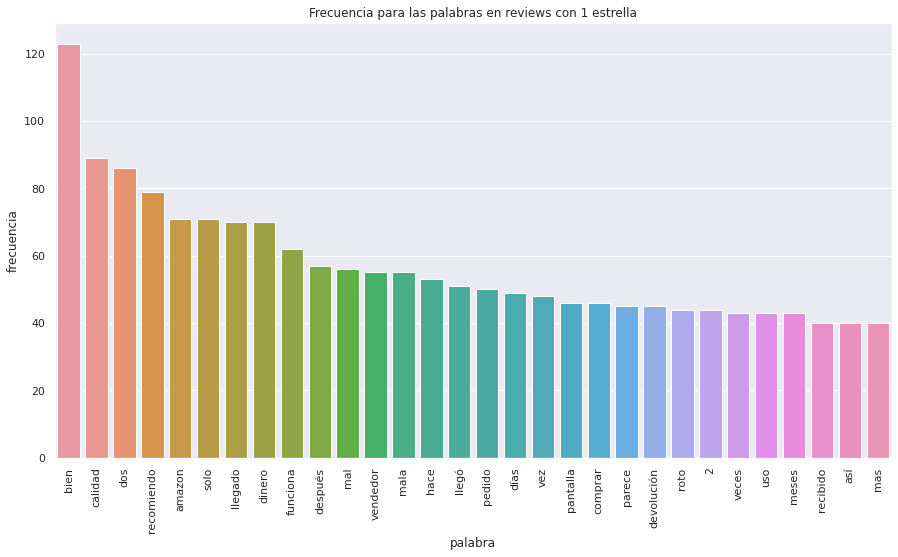

In [12]:
plt.figure(figsize = (15,8))
plt.title("Frecuencia para las palabras en reviews con 1 estrella")
plot = sns.barplot(x  = frecuencia1[:30].palabra, y = frecuencia1[:30].frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

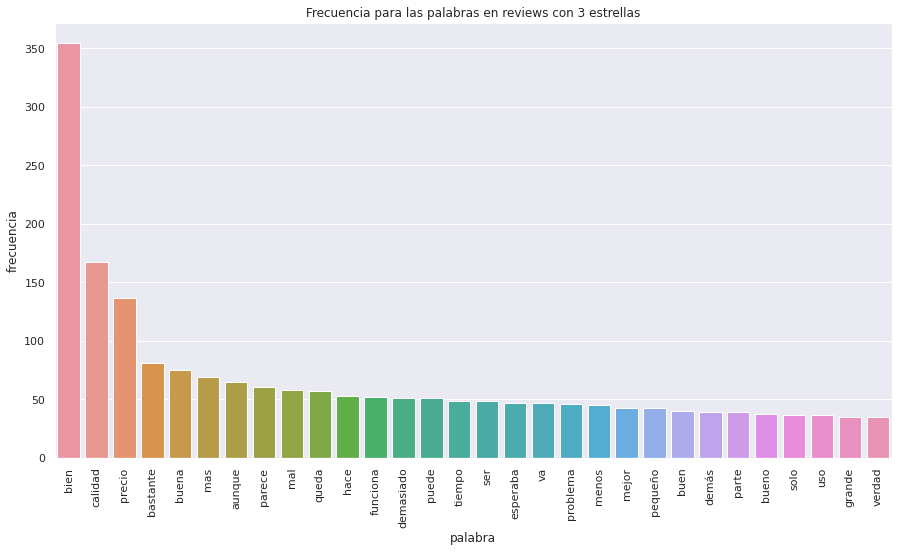

In [13]:
reviews_dev2 = []
ds_dev2 = ds_dev[ds_dev.stars == 3]
for i in range(ds_dev2.shape[0]):
    review = ds_dev2.iloc[i].review_body  
    review = review.lower()
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review if word not in stopwords]
    review = [word for word in review if word not in filtrar]

    reviews_dev2.append(review)

reviews_dev2 = list(itertools.chain(*reviews_dev2))
reviews_dev2[0:10]

frecuencia2 = nltk.FreqDist(reviews_dev2)

frecuencia2 = pd.DataFrame(list(frecuencia2.items()), columns = ["palabra","frecuencia"])

frecuencia2.sort_values('frecuencia',ascending=False, inplace = True)

plt.figure(figsize = (15,8))
plt.title("Frecuencia para las palabras en reviews con 3 estrellas")
plot = sns.barplot(x  = frecuencia2[:30].palabra, y = frecuencia2[:30].frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

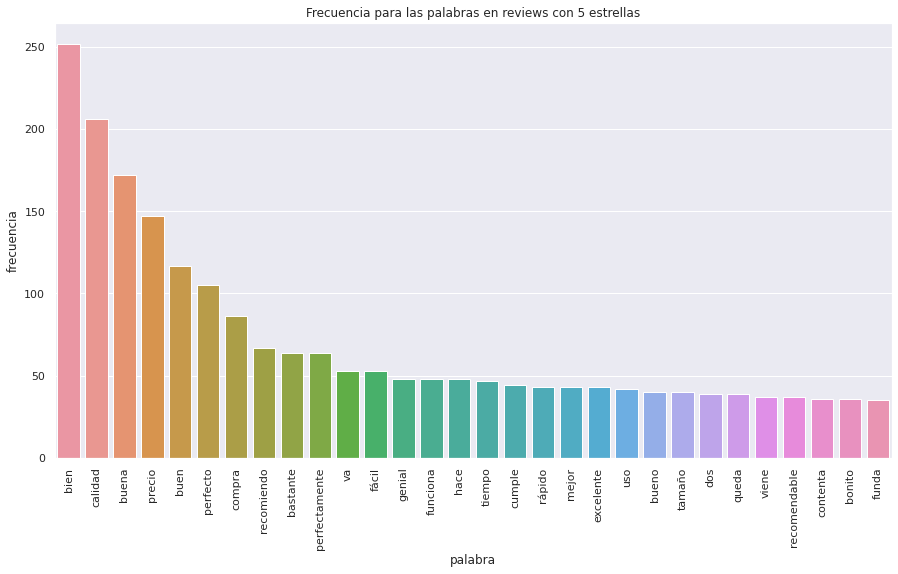

In [14]:
reviews_dev3 = []
ds_dev3 = ds_dev[ds_dev.stars == 5]
for i in range(ds_dev3.shape[0]):
    review = ds_dev3.iloc[i].review_body  
    review = review.lower()
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review if word not in stopwords]
    review = [word for word in review if word not in filtrar]

    reviews_dev3.append(review)

reviews_dev3 = list(itertools.chain(*reviews_dev3))
reviews_dev3[0:10]

frecuencia3 = nltk.FreqDist(reviews_dev3)

frecuencia3 = pd.DataFrame(list(frecuencia3.items()), columns = ["palabra","frecuencia"])

frecuencia3.sort_values('frecuencia',ascending=False, inplace = True)

plt.figure(figsize = (15,8))
plt.title("Frecuencia para las palabras en reviews con 5 estrellas")
plot = sns.barplot(x  = frecuencia3[:30].palabra, y = frecuencia3[:30].frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Vemos que hay mucha similaridad en las palabras frecuentes para los tres casos grupos elegidos.

In [15]:
#Para el modelo utilizo TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

In [16]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(ds_dev["review_body"])

In [17]:
#Convierto a Pandas Dataframe
df_idf = pd.DataFrame(data=tfidf_vectorizer_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [18]:
df_idf.shape

(5000, 11014)

In [20]:
import spacy
import spacy_transformers
nlp = spacy.load("es_core_news_sm")

In [111]:
#Definimos una funcion para pre-procesar el texto
def cleanData(txt):
    import re
    import string
    import itertools 
    import re
    import nltk
    from string import punctuation   

    #Reemplazo caracteres que no sean letras, por espacios
    txt=re.sub("[^a-zA-Z]"," ",str(txt))

    #Paso todo a minúsculas
    txt=txt.lower()

    #Tokenizo
    txt=nltk.word_tokenize(txt)
    
    #Lemmatización
    txt = nlp(" ".join(txt))
    txt = [token.lemma_ for token in txt]

    #Elimino las palabras de menos de 3 letras
    txt = [palabra for palabra in txt if len(palabra)>3]

    # Sacamos las Stopwords
    txt = [palabra for palabra in txt if not palabra in stopwords]

    txt=" ".join(txt)

    return txt

In [109]:
ds_dev_clean = ds_dev['review_body'].map(lambda x: cleanData(x))

In [110]:
ds_test_clean = ds_test['review_body'].map(lambda x: cleanData(x))

In [120]:
ds_dev_clean = pd.DataFrame(ds_dev_clean)
ds_test_clean = pd.DataFrame(ds_test_clean)

In [184]:
#Creo una función que haga la tarea anterior

def tokenize_review(review_text):
  #Importo las librerias necesarias
  from sklearn.feature_extraction.text import TfidfTransformer

  #Utilizo tf_idf
  tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features=500)
  tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(review_text)
  
  #Convierto a Pandas Dataframe
  df_idf = pd.DataFrame(data=tfidf_vectorizer_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names())

  return df_idf

def tokenize_review2(review_text):
  from sklearn.feature_extraction.text import CountVectorizer

  max_features=500

  cou_vec=CountVectorizer(max_features=max_features)
  resultado = cou_vec.fit_transform(review_text)
  resultado = pd.DataFrame(resultado.todense(), columns=cou_vec.get_feature_names())

  return resultado

In [185]:
prev = tokenize_review2(ds_dev_clean['review_body'])

In [186]:
xtrain = tokenize_review2(ds_dev_clean['review_body'])
ytrain = ds_dev['stars']
xtest = tokenize_review2(ds_test_clean['review_body'])
ytest = ds_test['stars']

In [187]:
#Modelo bench
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc train: ", nb.score(xtrain,ytrain))
print("acc test: ", nb.score(xtest,ytest))

acc train:  0.423
acc test:  0.232


Veo que el modelo benchmark tuvo una mala performance en general, pero acertó más en el set train que en el test. Esto puede significar un over-fitting. Para no sacar conclusiones apresuradas, veré primero como es la performance del modelo elegido.

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [204]:
rndforest = RandomForestClassifier(n_estimators=500, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)

In [205]:
rndforest.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [206]:
ytrain_pred = rndforest.predict(xtrain)
ytest_pred = rndforest.predict(xtest)

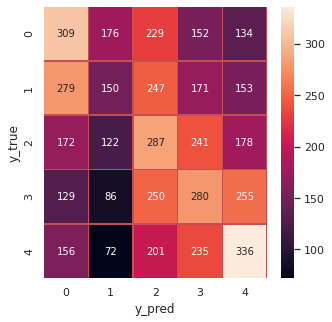

In [211]:
cm=confusion_matrix(ytest,ytest_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Podemos ver en el gráfico que el modelo es malo clasificando los reviews de 2 estrellas, respecto al resto.

In [208]:
print("acc train: ", accuracy_score(ytrain, ytrain_pred))
print("acc test: ", accuracy_score(ytest, ytest_pred))

acc train:  0.98
acc test:  0.2724


El modelo mejora mucho en train respecto al modelo benchmark, obtiene un accuracy muy alto, pero muy bajo para el set test. Esto probablemente se debe a una mala transformación de las features.